### Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Read Train and Test Datasets

In [2]:
train_dataset = pd.read_csv('Dataset/train.csv')
test_dataset = pd.read_csv('Dataset/test.csv')

### Pre-Process Data

Remove ID Columns

In [3]:
y_test_id = test_dataset['Id']

# Drop the 'Id' column
train_dataset = train_dataset.drop('Id', axis=1)
test_dataset = test_dataset.drop('Id', axis=1)

Encode Class Labels

In [4]:
label_encoder = LabelEncoder()
train_dataset["Species"] = label_encoder.fit_transform(train_dataset["Species"])
test_dataset["Species"] = label_encoder.transform(test_dataset["Species"])

### Split Xs and Ys

In [5]:
target_column = 'Species'

X_train = train_dataset.drop(target_column, axis=1)
y_train = train_dataset[target_column]

X_test = test_dataset.drop(target_column, axis=1)
y_test = test_dataset[target_column]

### Decision Tree

In [6]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### Predict

In [7]:
y_pred = tree_classifier.predict(X_test)

### Accuracy

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


### Confusion Matrix

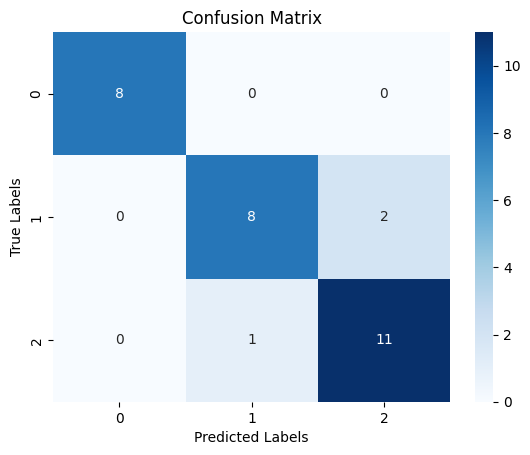

In [9]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Save Results

In [10]:
def save_results(predictions, file_name="Q1.csv"):
    predicted_species = label_encoder.inverse_transform(predictions)
    predicted_data = pd.DataFrame(predicted_species, columns=["Species"])
    predicted_data.to_csv(file_name, index=False)

In [11]:
save_results(y_pred)